In [3]:
import tensorflow as tf
tf.__version__ #코랩에서 버전 확인하느라 쓴 코드,,

'1.15.0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #0부터 1사이의 숫자로 만들어 주기 위해 (좀 더 빠르게 하려고)
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1) # 이거나 reshape을 사용해도 동일하다
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)
print(x_train[0].shape)

number of classes:  10
(28, 28, 1)


In [12]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3, 3), strides=2, activation='relu')(i) # x = f(i)
# 64, 128 추가
x = Conv2D(64,(3, 3), strides=2, activation='relu')(x)
x = Conv2D(128,(3, 3), strides=2, activation='relu')(x)
# Flatten()
x = Flatten()(x)
# Dropout()
x = Dropout(0.2)(x)
# Dense() -> Softmax
x = Dense(512, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               2626

In [15]:
# optimizer, loss, metrics 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical --- 실숫값 // sparse_categorical--- 정숫값

In [16]:
result = model.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 213us/sample - loss: 0.5086 - acc: 0.8125 - val_loss: 0.4014 - val_acc: 0.8485
Epoch 2/15
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3601 - acc: 0.8656 - val_loss: 0.3606 - val_acc: 0.8696
Epoch 3/15
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3100 - acc: 0.8838 - val_loss: 0.3246 - val_acc: 0.8827
Epoch 4/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2752 - acc: 0.8942 - val_loss: 0.3216 - val_acc: 0.8763
Epoch 5/15
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2497 - acc: 0.9047 - val_loss: 0.3037 - val_acc: 0.8883
Epoch 6/15
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2267 - acc: 0.9144 - val_loss: 0.2909 - val_acc: 0.8950
Epoch 7/15
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2077 - acc: 0.9208 

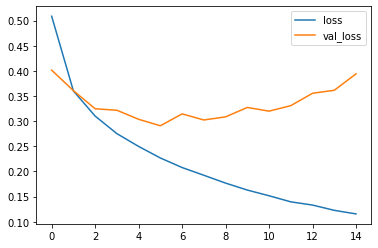

In [17]:
# Plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

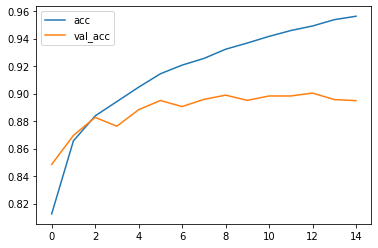

In [18]:
# Plot accuracy per iteration
plt.plot(result.history['acc'], label='acc')
plt.plot(result.history['val_acc'], label='val_acc')
plt.legend()

Consusion matrix, without normalization
[[808   1  29  15   5   1 135   0   6   0]
 [  4 972   2  11   4   0   5   0   2   0]
 [ 11   0 847   8  79   0  54   0   1   0]
 [ 10   4  22 880  40   1  43   0   0   0]
 [  2   1  45  20 865   0  66   0   1   0]
 [  0   0   0   1   0 962   0  17   1  19]
 [ 89   0  71  15  93   0 719   1  12   0]
 [  0   0   0   0   0  13   0 966   1  20]
 [  7   0   4   3   6   3   2   2 973   0]
 [  0   0   0   0   0   2   1  40   0 957]]


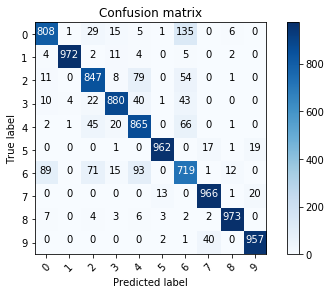

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [49]:
# Label mapping
labels = '''T-shirt/top
Trouser/pants
Pullover_shirt
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle_boot'''.split()
print(labels)

['T-shirt/top', 'Trouser/pants', 'Pullover_shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']


In [50]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
print(misclassified_idx)

[  12   23   29 ... 9977 9981 9991]


In [63]:
# show image
temp_idx = np.random.choice(misclassified_idx)
print(temp_idx)

2316


In [66]:
x_test[temp_idx].shape

(28, 28, 1)

Text(0.5, 1.0, 'True label: Sneaker, Predicted label: Ankle_boot')

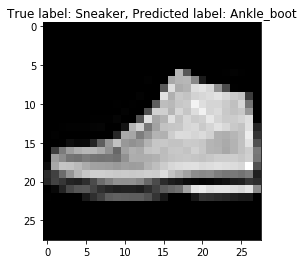

In [67]:
plt.imshow(x_test[temp_idx].reshape(28, 28), cmap='gray')
plt.title('True label: %s, Predicted label: %s' % (labels[p_test[temp_idx]], labels[y_test[temp_idx]]))